In [19]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [21]:
import numpy as np
import pandas as pd
# Đọc dữ liệu
cleveland = pd.read_csv('/content/drive/MyDrive/heart+disease/processed.cleveland.data', header=None)
hungarian = pd.read_csv('/content/drive/MyDrive/heart+disease/processed.hungarian.data', header=None)
switzerland = pd.read_csv('/content/drive/MyDrive/heart+disease/processed.switzerland.data', header=None)
# Tạo tên cột
columns = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
           'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target']
# Gán tên cột cho từng tập dữ liệu
cleveland.columns = columns
hungarian.columns = columns
switzerland.columns = columns
# Gộp dữ liệu lại thành 1 DataFrame
combined_data = pd.concat([cleveland, hungarian, switzerland], ignore_index=True)
# Thay thế dấu ? bằng NaN (Null)
combined_data.replace('?', np.nan, inplace=True)

In [22]:
combined_data = combined_data.apply(pd.to_numeric, errors='coerce')
combined_data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,720.000000,720.000000,720.000000,717.000000,697.000000,637.000000,718.000000,718.000000,718.000000,714.000000,513.000000,307.000000,400.000000,720.000000
mean,51.888889,0.738889,3.179167,131.804742,204.774749,0.109890,0.568245,140.565460,0.337047,0.789636,1.701754,0.680782,4.985000,0.850000
std,9.193720,0.439546,0.953646,18.529331,109.275156,0.312999,0.833534,25.647172,0.473031,1.066961,0.585249,0.937101,1.929789,1.076878
min,28.000000,0.000000,1.000000,80.000000,0.000000,0.000000,0.000000,60.000000,0.000000,-2.600000,1.000000,0.000000,3.000000,0.000000
25%,45.000000,0.000000,2.000000,120.000000,182.000000,0.000000,0.000000,122.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
50%,53.000000,1.000000,4.000000,130.000000,227.000000,0.000000,0.000000,142.000000,0.000000,0.200000,2.000000,0.000000,6.000000,0.500000
75%,58.000000,1.000000,4.000000,140.000000,270.000000,0.000000,1.000000,160.000000,1.000000,1.500000,2.000000,1.000000,7.000000,1.000000
max,77.000000,1.000000,4.000000,200.000000,603.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,7.000000,4.000000


In [23]:
combined_data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
715,70.0,1.0,4.0,115.0,0.0,0.0,1.0,92.0,1.0,0.0,2.0,NaN,7.0,1
716,70.0,1.0,4.0,140.0,0.0,1.0,0.0,157.0,1.0,2.0,2.0,NaN,7.0,3
717,72.0,1.0,3.0,160.0,0.0,NaN,2.0,114.0,0.0,1.6,2.0,2.0,NaN,0
718,73.0,0.0,3.0,160.0,0.0,0.0,1.0,121.0,0.0,0.0,1.0,NaN,3.0,1


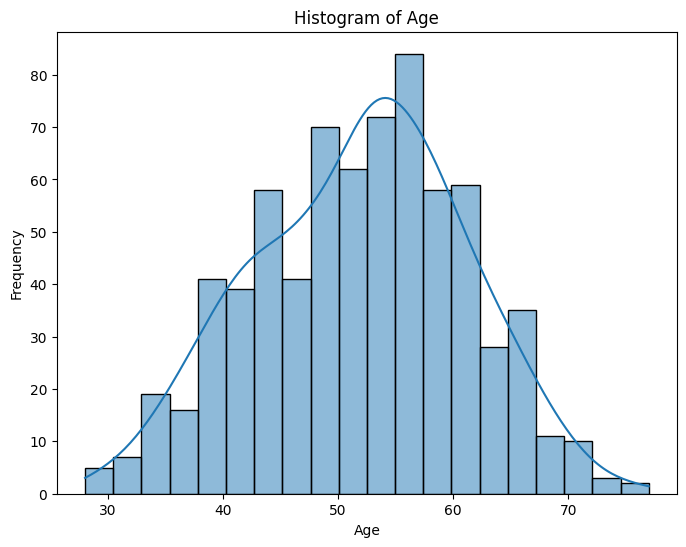

In [24]:
plt.figure(figsize=(8, 6))
sns.histplot(combined_data['age'], bins=20, kde=True)
plt.title('Histogram of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()


Text(0.5, 1.0, 'Resting Blood Pressure')

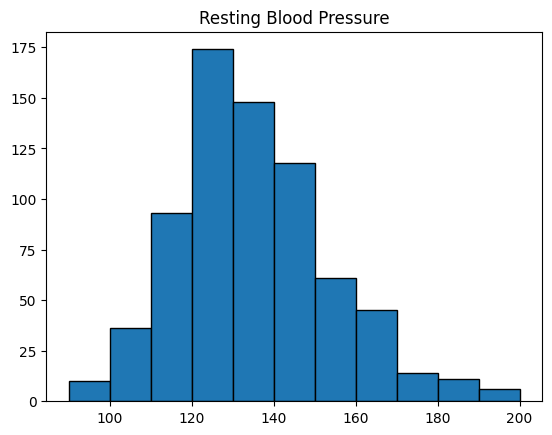

In [25]:
plt.hist(combined_data['trestbps'], bins = [90,100,110,120,130,140,150,160,170,180,190,200], edgecolor = 'black')
plt.title('Resting Blood Pressure')

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When 

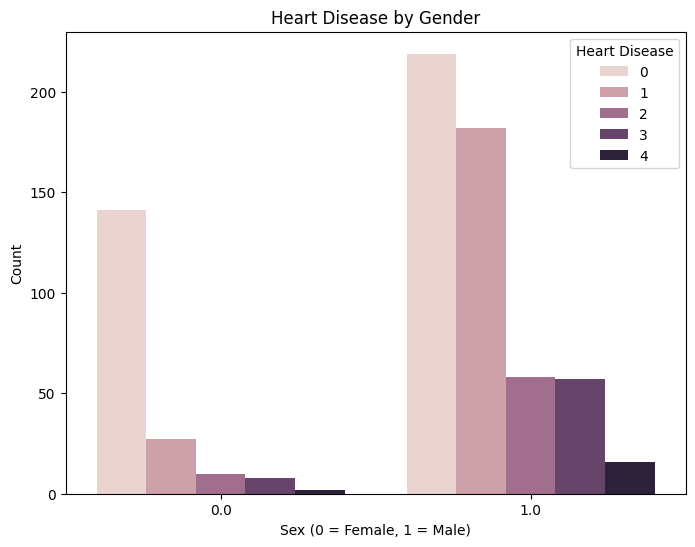

In [26]:
plt.figure(figsize=(8, 6))
sns.countplot(data=combined_data, x='sex', hue='target')
plt.title('Heart Disease by Gender')
plt.xlabel('Sex (0 = Female, 1 = Male)')
plt.ylabel('Count')
plt.legend(title='Heart Disease', loc='upper right')
plt.show()


/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When 

Number of Female Patients: 188
Number of Male Patients: 532


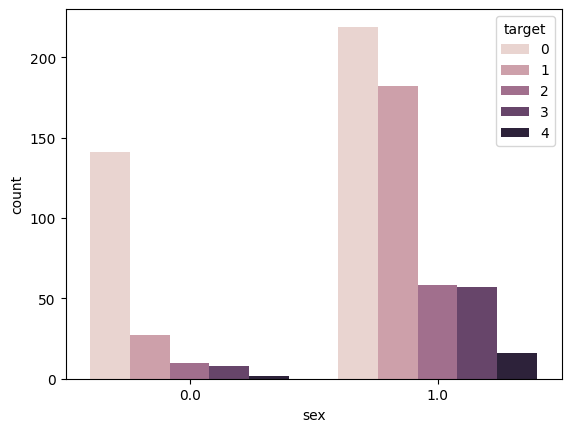

In [27]:
sns.countplot(x="sex", data=combined_data,hue='target')
male, fm = combined_data['sex'].value_counts()
print('Number of Female Patients:', fm)
print('Number of Male Patients:', male)

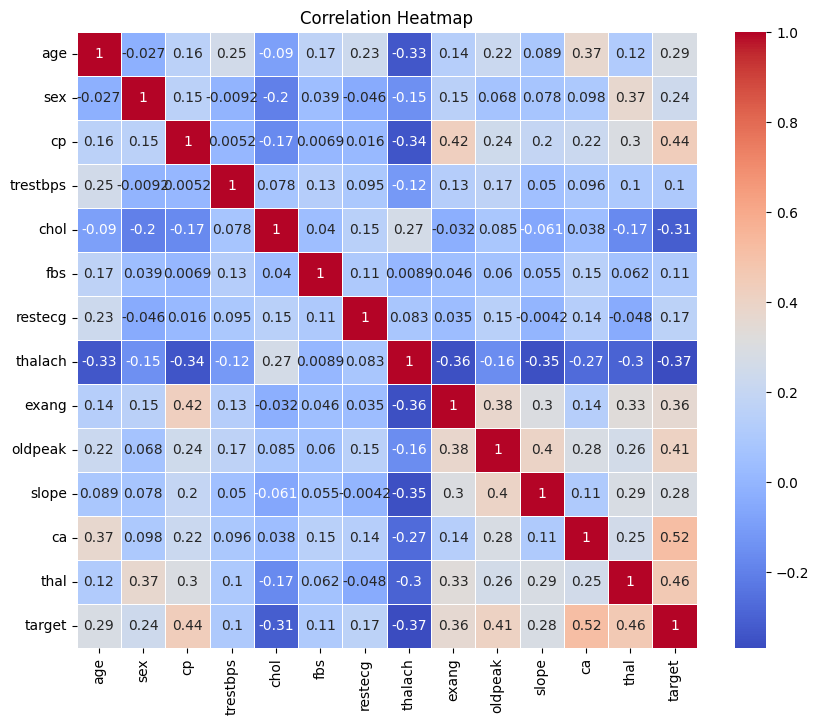

In [28]:
plt.figure(figsize=(10, 8))
corr_matrix = combined_data.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()